<a href="https://colab.research.google.com/github/Farii01/Breast-cancer-classification/blob/main/BreastCancerDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import os
import numpy as np


len(os.listdir('/content/Data/Cancer'))
len(os.listdir('/content/Data/Negative'))

410

In [93]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/Data/Cancer/1.jpg')

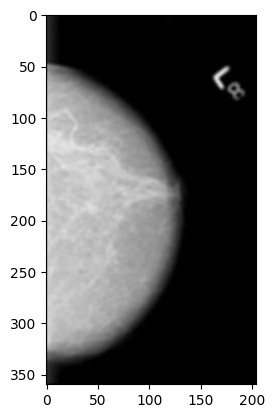

In [94]:
plt.imshow(img)

In [95]:
img.shape

(360, 204, 3)

In [96]:
urls = os.listdir('/content/Data')

In [97]:
path = "/content/Data" + urls[0]

In [98]:
path

'/content/DataCancer'

In [99]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [100]:
cancer_path = "/content/Data/Cancer"
cancerUrl = os.listdir(cancer_path)
cancerImages, covidTargets = loadImages(cancer_path, cancerUrl, 1)

In [101]:
len(cancerUrl), len(cancerImages)

(410, 410)

In [102]:
normal_path = "/content/Data/Negative"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [103]:
cancerImages.shape

(410, 100, 100, 3)

In [104]:
normalImages.shape

(410, 100, 100, 3)

In [105]:
data = np.r_[cancerImages, normalImages]

In [106]:
data.shape

(820, 100, 100, 3)

In [107]:
targets = np.r_[covidTargets, normalTargets]

In [108]:
targets.shape

(820,)

In [109]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 16)      

In [112]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [114]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and evaluated on the test data
history = model.fit(x_train, y_train, batch_size=10, epochs=10, validation_data=(x_test, y_test))


Epoch 1/2
62/62 [==============================] - 8s 124ms/step - loss: 0.2638 - accuracy: 0.8943 - val_loss: 0.2992 - val_accuracy: 0.8732
Epoch 2/2
62/62 [==============================] - 11s 172ms/step - loss: 0.2116 - accuracy: 0.9220 - val_loss: 0.2321 - val_accuracy: 0.9317


In [115]:
# Extract training and validation accuracy and loss values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create plots for training and validation accuracy
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

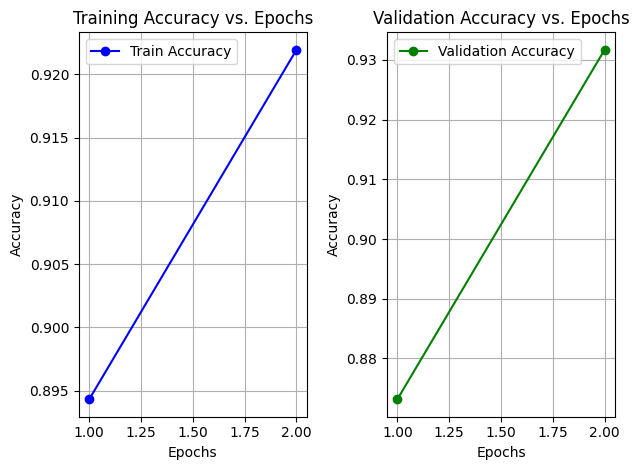

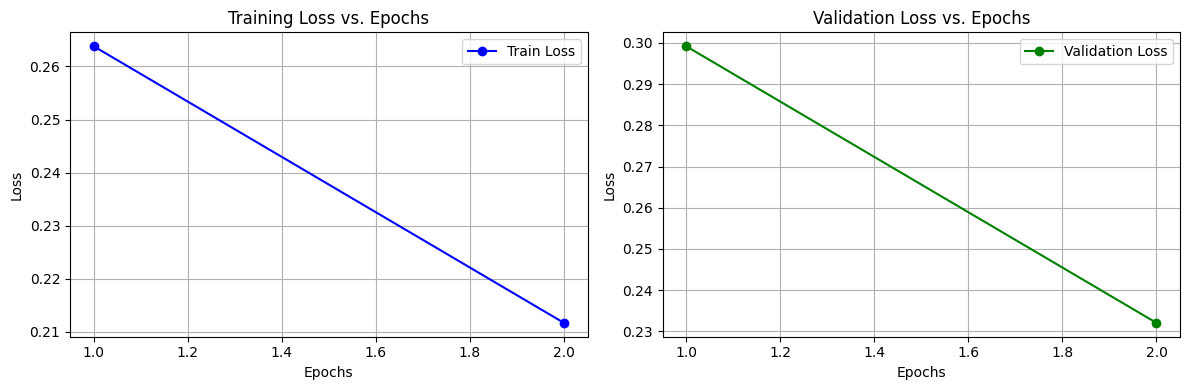

In [116]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, marker='o', linestyle='-', color='g', label='Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Create plots for training and validation loss
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, marker='o', linestyle='-', color='b', label='Train Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_loss) + 1), val_loss, marker='o', linestyle='-', color='g', label='Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()